In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("/Users/sa2/Desktop/TKH/Financial-Fraud-Detection/data/raw/PS_20174392719_1491204439457_log.csv")

In [13]:

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [15]:
df.shape

(6362620, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
col_names = df.columns

col_names

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['type', 'nameOrig', 'nameDest']


In [19]:
df[categorical].head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [20]:
df[categorical].isnull().sum()

type        0
nameOrig    0
nameDest    0
dtype: int64

In [21]:
for var in categorical: 
    
    print(df[var].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64


In [22]:
for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')


type  contains  5  labels
nameOrig  contains  6353307  labels
nameDest  contains  2722362  labels


In [30]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [31]:
df[numerical].head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [32]:
df[numerical].isnull().sum()


step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [35]:
print(round(df[numerical].describe()),2)

            step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  6362620.0   6362620.0      6362620.0       6362620.0       6362620.0   
mean       243.0    179862.0       833883.0        855114.0       1100702.0   
std        142.0    603858.0      2888243.0       2924049.0       3399180.0   
min          1.0         0.0            0.0             0.0             0.0   
25%        156.0     13390.0            0.0             0.0             0.0   
50%        239.0     74872.0        14208.0             0.0        132706.0   
75%        335.0    208721.0       107315.0        144258.0        943037.0   
max        743.0  92445517.0     59585040.0      49585040.0     356015889.0   

       newbalanceDest    isFraud  isFlaggedFraud  
count       6362620.0  6362620.0       6362620.0  
mean        1224996.0        0.0             0.0  
std         3674129.0        0.0             0.0  
min               0.0        0.0             0.0  
25%               0.0        0.0 

In [45]:
numerical = pd.DataFrame(numerical)

In [47]:
numericall = {
    "step": df ["step"],
    "amount": df ["amount"],
    "oldbalanceOrg": df ["oldbalanceOrg"],
    "newbalanceOrig": df ["newbalanceOrig"],
    "oldbalanceDest": df ["oldbalanceDest"],
    "newbalanceDest": df ["newbalanceDest"],
    "amount": df ["amount"],
    "isFraud": df ["isFraud"],
    "isFlaggedFraud": df ["isFlaggedFraud"]
}

In [50]:
numericall = pd.DataFrame(numericall)

NameError: name 'numericall' is not defined

In [49]:
sns.pairplot(numericall)

NameError: name 'numericall' is not defined

Text(0, 0.5, 'newbalanceOrig')

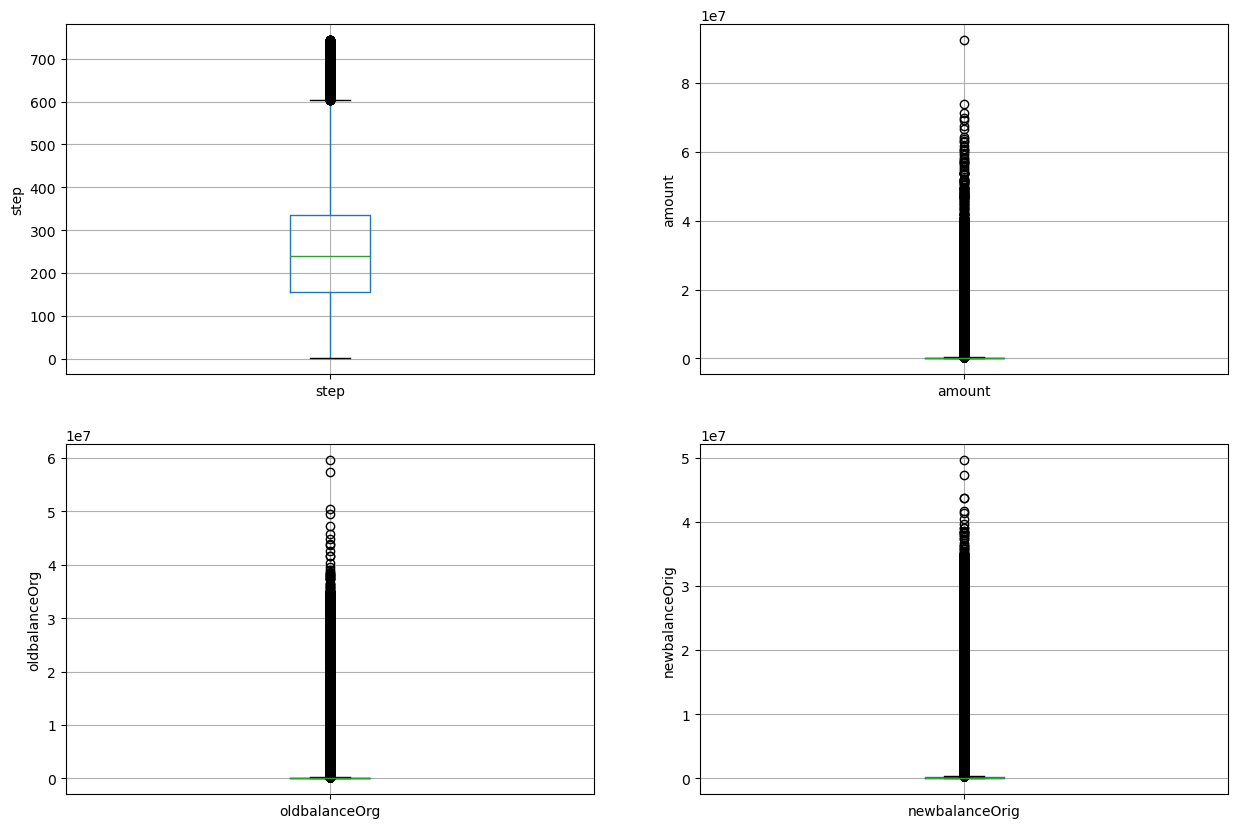

In [36]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='step')
fig.set_title('')
fig.set_ylabel('step')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='amount')
fig.set_title('')
fig.set_ylabel('amount')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='oldbalanceOrg')
fig.set_title('')
fig.set_ylabel('oldbalanceOrg')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='newbalanceOrig')
fig.set_title('')
fig.set_ylabel('newbalanceOrig')

Text(0, 0.5, 'isFlaggedFraud')

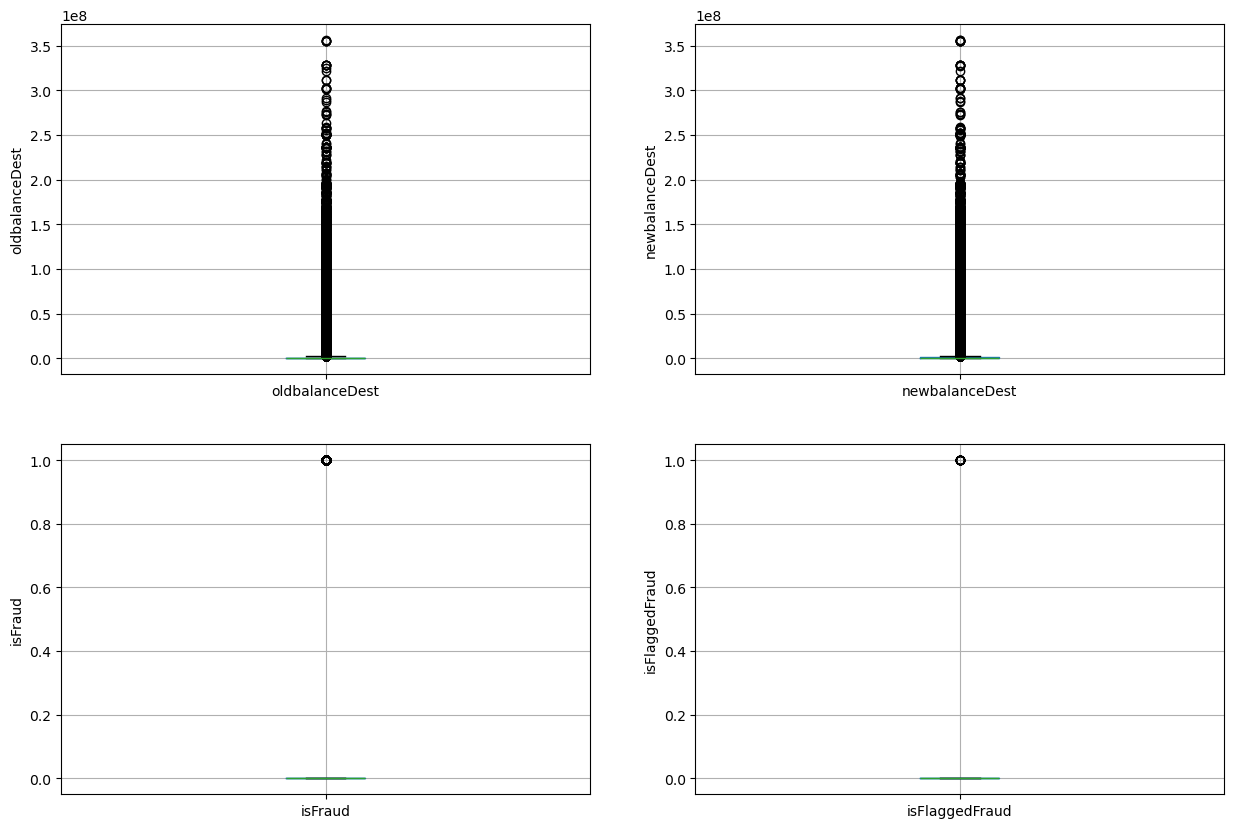

In [37]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='oldbalanceDest')
fig.set_title('')
fig.set_ylabel('oldbalanceDest')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='newbalanceDest')
fig.set_title('')
fig.set_ylabel('newbalanceDest')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='isFraud')
fig.set_title('')
fig.set_ylabel('isFraud')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='isFlaggedFraud')
fig.set_title('')
fig.set_ylabel('isFlaggedFraud')

Text(0, 0.5, 'isFraud')

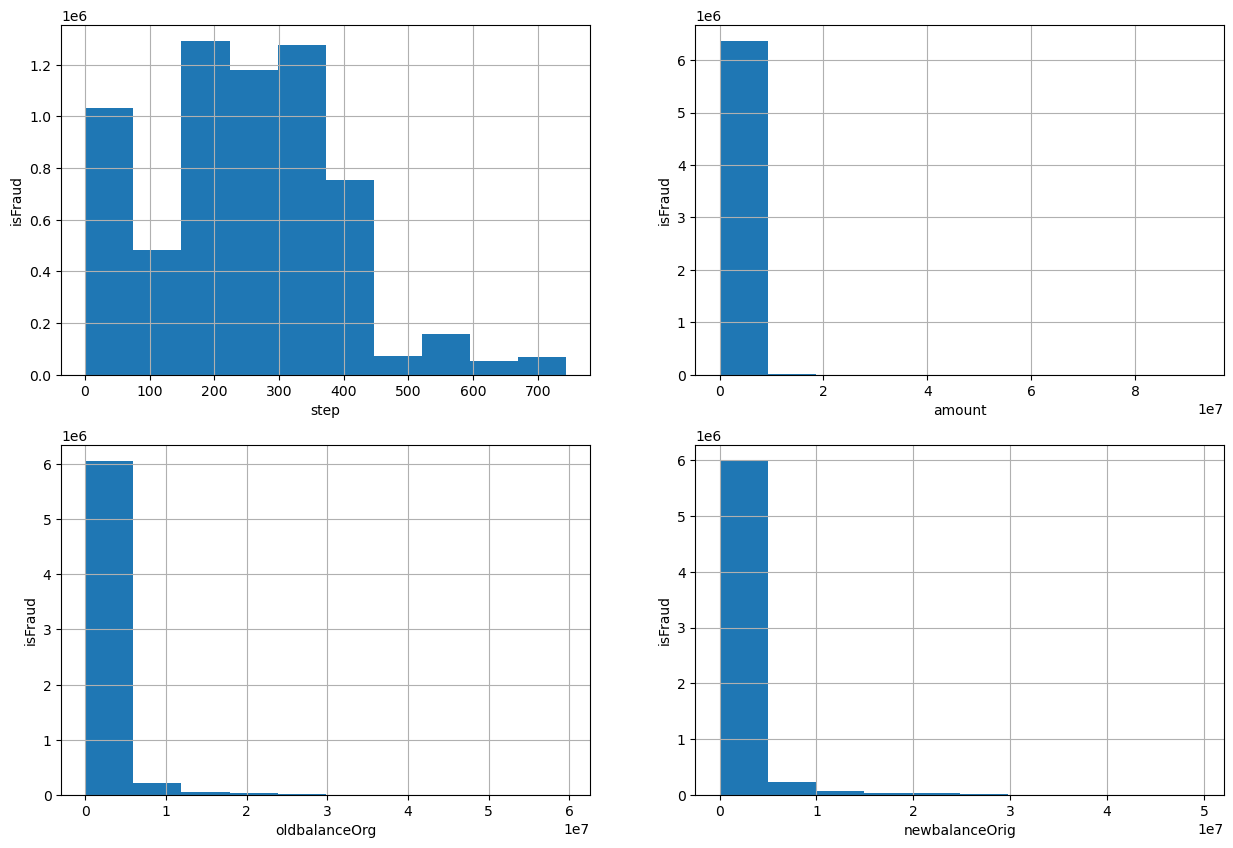

In [39]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.step.hist(bins=10)
fig.set_xlabel('step')
fig.set_ylabel('isFraud')


plt.subplot(2, 2, 2)
fig = df.amount.hist(bins=10)
fig.set_xlabel('amount')
fig.set_ylabel('isFraud')


plt.subplot(2, 2, 3)
fig = df.oldbalanceOrg.hist(bins=10)
fig.set_xlabel('oldbalanceOrg')
fig.set_ylabel('isFraud')


plt.subplot(2, 2, 4)
fig = df.newbalanceOrig.hist(bins=10)
fig.set_xlabel('newbalanceOrig')
fig.set_ylabel('isFraud')

In [ ]:
#formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')  # Formatting to show in millions (1M)

#plt.gca().yaxis.set_major_formatter(formatter)

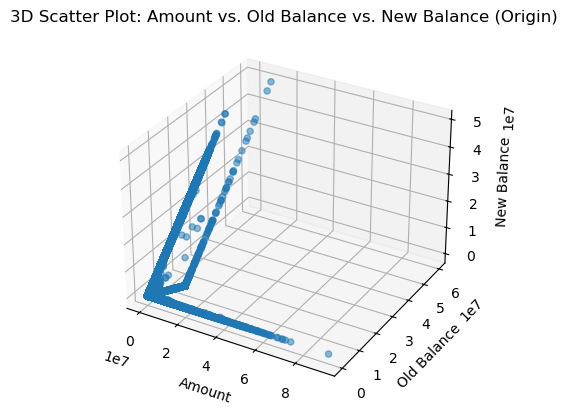

In [41]:
# Create a figure for plotting
fig = plt.figure()

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'amount', 'oldbalanceOrg', and 'newbalanceOrig' columns
ax.scatter(df['amount'], df['oldbalanceOrg'], df['newbalanceOrig'], marker='o', alpha=0.5)

# Set labels for the axes
ax.set_xlabel('Amount')
ax.set_ylabel('Old Balance')
ax.set_zlabel('New Balance')

# Set the title for the plot
ax.set_title('3D Scatter Plot: Amount vs. Old Balance vs. New Balance (Origin)')

# Show the plot
plt.show()